# MEMORY BASED COLLABORATIVE FILTERING

In [1]:
import numpy  as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import ratings
rating_df = pd.read_csv("../input/mymoviedatasetsforrecom/ratings.csv")
# import movies
movie_df  = pd.read_csv("../input/mymoviedatasetsforrecom/movies.csv") 

In [3]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
rating_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [5]:
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movie_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
df = movie_df.merge(rating_df,how='left',on='movieId')

In [9]:
df.dropna(inplace=True)

In [10]:
df['userId'] = df['userId'].apply(lambda x : 'U'+str(int(x)) )

In [11]:
df.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [12]:
print("UNIQUE USERS      : {}".format(df['userId'].nunique()))
print("UNIQUE RATINGS    : {}".format(df['rating'].nunique()))
print("UNIQUE MOVIES     : {}".format(df['movieId'].nunique()))
print("UNIQUE RATINGS ARE: {}".format(sorted(df['rating'].unique())))

UNIQUE USERS      : 610
UNIQUE RATINGS    : 10
UNIQUE MOVIES     : 9724
UNIQUE RATINGS ARE: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100853
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  object 
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.4+ MB


## EDA

In [14]:
df.head()
number_of_ratings = df.groupby('title')[['rating']].sum()

In [15]:
non_person_recom = number_of_ratings.sort_values(by='rating',ascending=False)

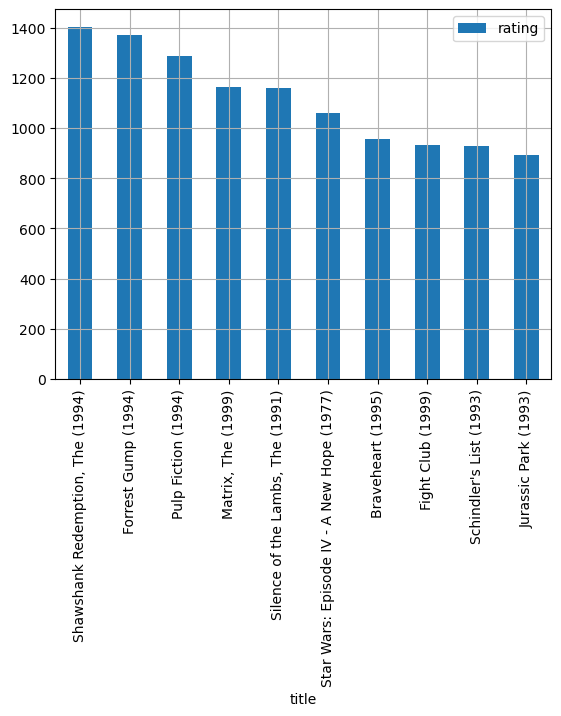

In [16]:
non_person_recom.head(10).plot(kind='bar')
plt.grid()

([<matplotlib.patches.Wedge at 0x7b2040958580>,
 [Text(1.4766512394216118, 0.6160366199461018, 'Shawshank Redemption, The (1994)'),
  Text(0.6152051660897513, 1.4769978346688535, 'Forrest Gump (1994)'),
  Text(-0.554209835090908, 1.500950185278815, 'Pulp Fiction (1994)'),
  Text(-1.3834962535810587, 0.8037027537138188, 'Matrix, The (1999)'),
  Text(-1.586778079396393, -0.20526891325062993, 'Silence of the Lambs, The (1991)'),
  Text(-1.1658564013268717, -1.0958005527855679, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(-0.3934087604065243, -1.550880249160264, 'Braveheart (1995)'),
  Text(0.4464289791206192, -1.5364573429162691, 'Fight Club (1999)'),
  Text(1.1551591996709425, -1.1070714626507125, "Schindler's List (1993)"),
  Text(1.5497666394015426, -0.39777300486338946, 'Jurassic Park (1993)')],
 [Text(1.015197727102358, 0.423525176212945, '13%'),
  Text(0.422953551686704, 1.0154360113348366, '12%'),
  Text(-0.3810192616249992, 1.0319032523791851, '12%'),
  Text(-0.95115367433

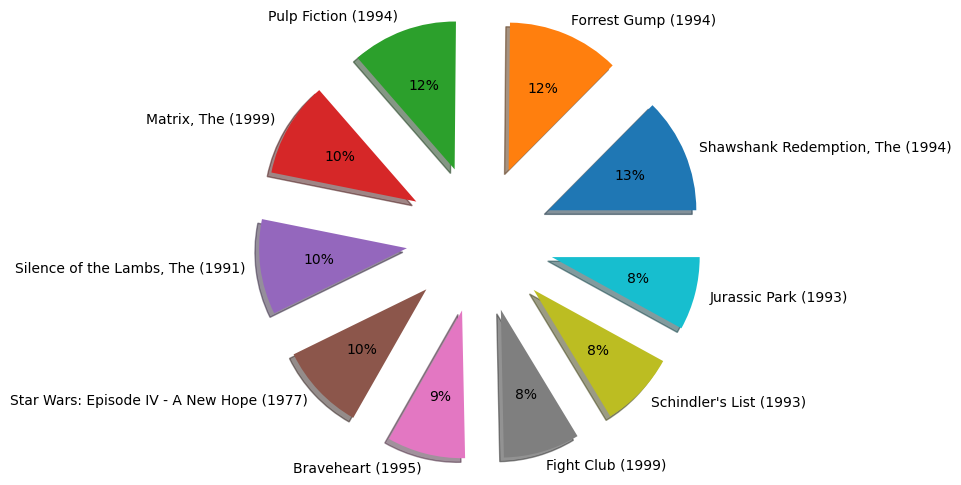

In [17]:
non_person_recom.head(10).reset_index()['title']
plt.pie(non_person_recom.head(10).reset_index()['rating'],labels=non_person_recom.head(10).reset_index()['title'],autopct='%.0f%%', shadow=True,
       explode=(.5, .5, .5, .5,.5,.5,.5,.5,.5,.5))

# Personalised Rating (user based collaborative filtering)

In [18]:
## optional
## this is a optional filtering
## a lot of people may give you rating but just like in the real world
## in order to qualify as a user. the user in the dataframe must rate at least 30 movie
## and in order to qualify as a movie it has to be rated by 30 users
## This is done to accurate the data.because anyone can give a rating . but we need real movie critics
## and we are not recommend a movie which is just rated by 1 or 5 user
## remember count function return row count

In [19]:
movie_qualify_filter_1= df[df.groupby('movieId')['movieId'].transform('count') > 30]

In [20]:
movie_qualify_filter_1.groupby('title')['rating'].count().sort_values(ascending=True)

title
Madness of King George, The (1994)     31
Blind Side, The  (2009)                31
Red Dragon (2002)                      31
Insider, The (1999)                    31
Island, The (2005)                     31
                                     ... 
Matrix, The (1999)                    278
Silence of the Lambs, The (1991)      279
Pulp Fiction (1994)                   307
Shawshank Redemption, The (1994)      317
Forrest Gump (1994)                   329
Name: rating, Length: 860, dtype: int64

In [21]:
final_filter = movie_qualify_filter_1[movie_qualify_filter_1.groupby('userId')['userId'].transform('count')>30]

In [22]:
final_filter.groupby('userId')['userId'].count().sort_values(ascending=True)

userId
U255     31
U537     31
U501     31
U209     31
U366     31
       ... 
U474    551
U274    564
U68     666
U599    688
U414    791
Name: userId, Length: 429, dtype: int64

In [23]:
final_filter

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,U1,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,U5,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,U7,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,U15,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,U17,4.5,1.305696e+09
...,...,...,...,...,...,...
99758,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,U567,2.5,1.525288e+09
99759,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,U586,5.0,1.529903e+09
99760,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,U596,4.0,1.535709e+09
99761,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,U601,4.5,1.521398e+09


In [24]:
## make the interaction matrix
## row will be user
## column will be movies title
## rating will be the activity
interaction_matrix = final_filter.pivot_table(index='userId', columns=['title'],values='rating',fill_value=0.0)


In [25]:
interaction_matrix

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",50 First Dates (2004),...,X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yes Man (2008),You've Got Mail (1998),Young Frankenstein (1974),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016)
userId,,,,,,,,,,,,,,,,,,,,,
U1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
U10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.5,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
U100,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0
U101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U95,0.0,0.0,0.0,4.0,0.0,5.0,4.5,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
## find the cosine similarity (row wise because every row is a user vector)
cosine_sim = cosine_similarity(interaction_matrix)

In [27]:
## all the user relation with all the users
cosine_sim

array([[1.        , 0.02963128, 0.22414704, ..., 0.3515628 , 0.09762664,
        0.08904904],
       [0.02963128, 1.        , 0.13904773, ..., 0.02938267, 0.19496937,
        0.03337638],
       [0.22414704, 0.13904773, 1.        , ..., 0.09547732, 0.08673833,
        0.10293173],
       ...,
       [0.3515628 , 0.02938267, 0.09547732, ..., 1.        , 0.08025835,
        0.08646229],
       [0.09762664, 0.19496937, 0.08673833, ..., 0.08025835, 1.        ,
        0.        ],
       [0.08904904, 0.03337638, 0.10293173, ..., 0.08646229, 0.        ,
        1.        ]])

In [32]:
interaction_matrix.index.values

array(['U1', 'U10', 'U100', 'U101', 'U102', 'U103', 'U104', 'U105',
       'U107', 'U108', 'U109', 'U11', 'U111', 'U112', 'U113', 'U115',
       'U116', 'U117', 'U119', 'U121', 'U122', 'U123', 'U124', 'U125',
       'U126', 'U129', 'U131', 'U132', 'U133', 'U134', 'U135', 'U136',
       'U137', 'U139', 'U14', 'U140', 'U141', 'U142', 'U143', 'U144',
       'U148', 'U149', 'U15', 'U152', 'U153', 'U155', 'U156', 'U159',
       'U16', 'U160', 'U162', 'U165', 'U166', 'U167', 'U168', 'U169',
       'U17', 'U170', 'U171', 'U174', 'U176', 'U177', 'U178', 'U179',
       'U18', 'U181', 'U182', 'U183', 'U184', 'U185', 'U186', 'U187',
       'U19', 'U190', 'U191', 'U195', 'U198', 'U199', 'U20', 'U200',
       'U201', 'U202', 'U203', 'U204', 'U209', 'U21', 'U210', 'U211',
       'U212', 'U213', 'U215', 'U216', 'U217', 'U219', 'U22', 'U220',
       'U221', 'U222', 'U223', 'U224', 'U225', 'U226', 'U227', 'U229',
       'U23', 'U230', 'U232', 'U233', 'U234', 'U235', 'U237', 'U239',
       'U24', 'U240'

In [33]:
cosine_sm_df = pd.DataFrame(cosine_sim,columns=interaction_matrix.index.values,index=interaction_matrix.index.values)

In [34]:
cosine_sm_df

,U1,U10,U100,U101,U102,U103,U104,U105,U107,U108,...,U86,U88,U89,U91,U93,U94,U95,U96,U98,U99
U1,1.000000,0.029631,0.224147,0.205724,0.192159,0.281740,0.191399,0.172736,0.083232,0.100425,...,0.202184,0.082149,0.076865,0.466406,0.293322,0.132839,0.247512,0.351563,0.097627,0.089049
U10,0.029631,1.000000,0.139048,0.036537,0.053629,0.184346,0.237710,0.286542,0.004706,0.090209,...,0.239104,0.156070,0.145750,0.098867,0.047292,0.055384,0.074977,0.029383,0.194969,0.033376
U100,0.224147,0.139048,1.000000,0.108984,0.169494,0.189109,0.232526,0.130408,0.127252,0.158115,...,0.097322,0.062212,0.149073,0.289663,0.172126,0.157040,0.119562,0.095477,0.086738,0.102932
U101,0.205724,0.036537,0.108984,1.000000,0.033300,0.155307,0.072663,0.126807,0.000000,0.062336,...,0.141089,0.042397,0.149868,0.187913,0.017734,0.000000,0.077559,0.140482,0.000000,0.000000
U102,0.192159,0.053629,0.169494,0.033300,1.000000,0.115074,0.116600,0.083164,0.371301,0.018884,...,0.144627,0.056102,0.009238,0.324702,0.250539,0.596905,0.056543,0.148793,0.072340,0.465050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U94,0.132839,0.055384,0.157040,0.000000,0.596905,0.170355,0.124086,0.077190,0.601649,0.026696,...,0.158356,0.034990,0.023355,0.294173,0.333689,1.000000,0.065569,0.218625,0.056478,0.491488
U95,0.247512,0.074977,0.119562,0.077559,0.056543,0.246704,0.173627,0.260077,0.000000,0.226620,...,0.168925,0.091111,0.084569,0.362811,0.123506,0.065569,1.000000,0.268220,0.085925,0.019052
U96,0.351563,0.029383,0.095477,0.140482,0.148793,0.220182,0.109472,0.138169,0.143816,0.120922,...,0.213834,0.058672,0.074944,0.347719,0.287791,0.218625,0.268220,1.000000,0.080258,0.086462
U98,0.097627,0.194969,0.086738,0.000000,0.072340,0.189851,0.163738,0.278136,0.026662,0.046581,...,0.112026,0.113872,0.170973,0.210193,0.070920,0.056478,0.085925,0.080258,1.000000,0.000000


<Axes: >

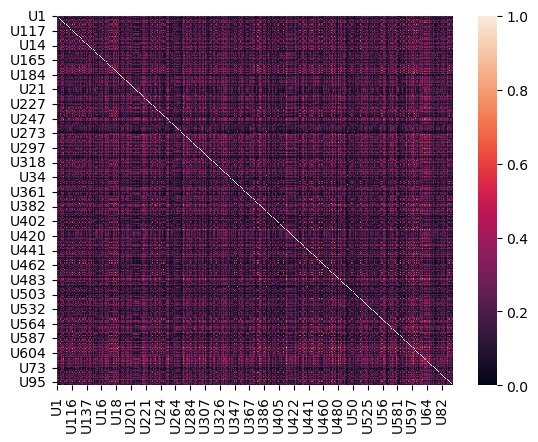

In [35]:
sns.heatmap(cosine_sm_df)

In [43]:
picked_user = 'U6'
simmiler_user = cosine_sm_df[[picked_user]]
simmiler_user

,U6
U1,0.210751
U10,0.042341
U100,0.239153
U101,0.007568
U102,0.552243
...,...
U94,0.597693
U95,0.070021
U96,0.159088
U98,0.052309


In [64]:
top_s_user = simmiler_user.sort_values(by=picked_user,ascending=False).iloc[1:6]
top_s_user

,U6
U117,0.762583
U58,0.729737
U181,0.709279
U240,0.686625
U43,0.661703


In [72]:
## active user row
top_s_user.index.values

array(['U117', 'U58', 'U181', 'U240', 'U43'], dtype=object)

In [74]:
active_user_CustomerID = 'U6'
similar_user_CustomerIDs = top_s_user.index.values


In [75]:
active_user_row_info = interaction_matrix.loc[active_user_CustomerID]

item_recommended = []
for sm_user_id in similar_user_CustomerIDs:
    similar_user_row_info = interaction_matrix.loc[sm_user_id]
    for title,rating in similar_user_row_info.items():
        if rating > 0:
            if active_user_row_info[title] == 0:
                recom_item = {'Movie':title,'Rating':rating}
                item_recommended.append(recom_item)

In [76]:
item_recommended

[{'Movie': 'Beverly Hills Cop III (1994)', 'Rating': 3.0},
 {'Movie': 'Brady Bunch Movie, The (1995)', 'Rating': 3.0},
 {'Movie': 'Cinderella (1950)', 'Rating': 4.0},
 {'Movie': 'Clueless (1995)', 'Rating': 3.0},
 {'Movie': 'Demolition Man (1993)', 'Rating': 3.0},
 {'Movie': 'Die Hard (1988)', 'Rating': 3.0},
 {'Movie': 'Dragonheart (1996)', 'Rating': 3.0},
 {'Movie': 'Ed Wood (1994)', 'Rating': 3.0},
 {'Movie': 'Eraser (1996)', 'Rating': 3.0},
 {'Movie': 'Escape from L.A. (1996)', 'Rating': 3.0},
 {'Movie': 'Fish Called Wanda, A (1988)', 'Rating': 4.0},
 {'Movie': 'Heavy Metal (1981)', 'Rating': 3.0},
 {'Movie': 'Home Alone (1990)', 'Rating': 4.0},
 {'Movie': 'James and the Giant Peach (1996)', 'Rating': 3.0},
 {'Movie': 'Johnny Mnemonic (1995)', 'Rating': 3.0},
 {'Movie': 'Madness of King George, The (1994)', 'Rating': 4.0},
 {'Movie': 'Mary Poppins (1964)', 'Rating': 4.0},
 {'Movie': 'Mission: Impossible (1996)', 'Rating': 3.0},
 {'Movie': 'Mortal Kombat (1995)', 'Rating': 2.0},
 {'

In [77]:
final = pd.DataFrame(item_recommended)

In [87]:
final.groupby('Movie')['Movie'].count().sort_values(ascending=False).head(5)

Movie
Beverly Hills Cop III (1994)              4
Pocahontas (1995)                         4
Clueless (1995)                           4
Judge Dredd (1995)                        3
Nightmare Before Christmas, The (1993)    3
Name: Movie, dtype: int64

# ITEM BASED FILTERING

In [88]:
## make the interaction matrix
## row will be movies title
## column will be userId
## rating will be the activity
interaction_matrix = final_filter.pivot_table(index='title', columns=['userId'],values='rating',fill_value=0.0)
interaction_matrix.head()

userId,U1,U10,U100,U101,U102,U103,U104,U105,U107,U108,...,U86,U88,U89,U91,U93,U94,U95,U96,U98,U99
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0,0.0,0.0,0,0,0.0,0.0,5.0,0,0,...,0.0,0.0,2.5,0.0,0,0,0.0,0,0.0,0
10 Things I Hate About You (1999),0,0.0,0.0,0,0,0.0,5.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0
101 Dalmatians (1996),0,0.0,0.0,0,0,3.5,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,...,0.0,0.0,3.0,0.0,0,0,4.0,0,0.0,0
12 Angry Men (1957),0,0.0,4.0,0,0,0.0,0.0,4.5,0,0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0


In [89]:
item_similarity = cosine_similarity(interaction_matrix)
item_similarity

array([[1.        , 0.28194035, 0.21598702, ..., 0.43997318, 0.32130468,
        0.29401516],
       [0.28194035, 1.        , 0.31449065, ..., 0.25943675, 0.372423  ,
        0.13032187],
       [0.21598702, 0.31449065, 1.        , ..., 0.21111093, 0.2756441 ,
        0.13302182],
       ...,
       [0.43997318, 0.25943675, 0.21111093, ..., 1.        , 0.37216375,
        0.38468465],
       [0.32130468, 0.372423  , 0.2756441 , ..., 0.37216375, 1.        ,
        0.17774235],
       [0.29401516, 0.13032187, 0.13302182, ..., 0.38468465, 0.17774235,
        1.        ]])

In [90]:
cosine_sm_df = pd.DataFrame(item_similarity,columns=interaction_matrix.index.values,index=interaction_matrix.index.values)

In [91]:
cosine_sm_df

,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",50 First Dates (2004),...,X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yes Man (2008),You've Got Mail (1998),Young Frankenstein (1974),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016)
(500) Days of Summer (2009),1.000000,0.281940,0.215987,0.193833,0.243240,0.220439,0.233814,0.407842,0.406725,0.369752,...,0.411966,0.342444,0.276786,0.471532,0.213043,0.135278,0.472876,0.439973,0.321305,0.294015
10 Things I Hate About You (1999),0.281940,1.000000,0.314491,0.280586,0.108807,0.216385,0.175212,0.366988,0.365554,0.340644,...,0.204537,0.235260,0.241723,0.180015,0.340226,0.210113,0.169212,0.259437,0.372423,0.130322
101 Dalmatians (1996),0.215987,0.314491,1.000000,0.344147,0.220586,0.238237,0.170350,0.283971,0.266843,0.278154,...,0.149858,0.245154,0.248920,0.140812,0.253896,0.294396,0.142625,0.211111,0.275644,0.133022
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.193833,0.280586,0.344147,1.000000,0.221777,0.205262,0.250212,0.283530,0.264755,0.310419,...,0.228128,0.299126,0.347629,0.090349,0.285407,0.280252,0.150227,0.257947,0.347545,0.150011
12 Angry Men (1957),0.243240,0.108807,0.220586,0.221777,1.000000,0.298222,0.235557,0.280231,0.235604,0.216104,...,0.192811,0.265160,0.249314,0.191721,0.161264,0.242404,0.307952,0.236180,0.204816,0.133806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Frankenstein (1974),0.135278,0.210113,0.294396,0.280252,0.242404,0.441650,0.240501,0.231503,0.276488,0.216217,...,0.208241,0.238305,0.248189,0.118119,0.210344,1.000000,0.193178,0.264992,0.297641,0.107003
Zodiac (2007),0.472876,0.169212,0.142625,0.150227,0.307952,0.423185,0.463086,0.420502,0.354269,0.240819,...,0.445361,0.404824,0.356744,0.428037,0.167594,0.193178,1.000000,0.472582,0.294500,0.276711
Zombieland (2009),0.439973,0.259437,0.211111,0.257947,0.236180,0.310969,0.449666,0.515113,0.424264,0.387485,...,0.494502,0.379108,0.377654,0.401878,0.192765,0.264992,0.472582,1.000000,0.372164,0.384685
Zoolander (2001),0.321305,0.372423,0.275644,0.347545,0.204816,0.254696,0.308543,0.477509,0.503326,0.445273,...,0.289053,0.356253,0.368340,0.240177,0.194748,0.297641,0.294500,0.372164,1.000000,0.177742


In [92]:
cosine_sm_df.columns

Index(['(500) Days of Summer (2009)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '12 Angry Men (1957)', '2001: A Space Odyssey (1968)',
       '28 Days Later (2002)', '300 (2007)', '40-Year-Old Virgin, The (2005)',
       '50 First Dates (2004)',
       ...
       'X-Men: First Class (2011)', 'X-Men: The Last Stand (2006)',
       'X2: X-Men United (2003)', 'Yes Man (2008)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Zodiac (2007)', 'Zombieland (2009)',
       'Zoolander (2001)', 'Zootopia (2016)'],
      dtype='object', length=860)

In [103]:
picked_item = '(500) Days of Summer (2009)'
simmiler_movies = cosine_sm_df[picked_item]
simmiler_movies

(500) Days of Summer (2009)                               1.000000
10 Things I Hate About You (1999)                         0.281940
101 Dalmatians (1996)                                     0.215987
101 Dalmatians (One Hundred and One Dalmatians) (1961)    0.193833
12 Angry Men (1957)                                       0.243240
                                                            ...   
Young Frankenstein (1974)                                 0.135278
Zodiac (2007)                                             0.472876
Zombieland (2009)                                         0.439973
Zoolander (2001)                                          0.321305
Zootopia (2016)                                           0.294015
Name: (500) Days of Summer (2009), Length: 860, dtype: float64

In [105]:
top_s_item = simmiler_movies.sort_values(ascending=False).iloc[1:6]
top_s_item

Toy Story 3 (2010)                    0.509382
Up in the Air (2009)                  0.506951
Hangover, The (2009)                  0.489336
Scott Pilgrim vs. the World (2010)    0.487978
Zodiac (2007)                         0.472876
Name: (500) Days of Summer (2009), dtype: float64

In [117]:
item_recommended

[{'Movie': 'U103', 'Rating': 3.0},
 {'Movie': 'U119', 'Rating': 3.5},
 {'Movie': 'U139', 'Rating': 2.0},
 {'Movie': 'U16', 'Rating': 4.5},
 {'Movie': 'U17', 'Rating': 4.0},
 {'Movie': 'U21', 'Rating': 4.0},
 {'Movie': 'U210', 'Rating': 4.0},
 {'Movie': 'U211', 'Rating': 4.0},
 {'Movie': 'U247', 'Rating': 4.0},
 {'Movie': 'U274', 'Rating': 4.5},
 {'Movie': 'U292', 'Rating': 4.0},
 {'Movie': 'U328', 'Rating': 5.0},
 {'Movie': 'U332', 'Rating': 4.0},
 {'Movie': 'U339', 'Rating': 4.0},
 {'Movie': 'U378', 'Rating': 4.0},
 {'Movie': 'U380', 'Rating': 5.0},
 {'Movie': 'U381', 'Rating': 4.0},
 {'Movie': 'U382', 'Rating': 5.0},
 {'Movie': 'U401', 'Rating': 3.5},
 {'Movie': 'U432', 'Rating': 4.0},
 {'Movie': 'U466', 'Rating': 3.5},
 {'Movie': 'U50', 'Rating': 2.0},
 {'Movie': 'U561', 'Rating': 4.5},
 {'Movie': 'U562', 'Rating': 4.5},
 {'Movie': 'U567', 'Rating': 2.0},
 {'Movie': 'U573', 'Rating': 5.0},
 {'Movie': 'U586', 'Rating': 4.5},
 {'Movie': 'U596', 'Rating': 3.5},
 {'Movie': 'U601', 'Rati